# **THE TURNING POINT**

## Analysis of 2016 USA presidential elections

### Team Members:
1. Adam Ben-Avi
2. Adheip Nagarajan
3. Anish Sawkar
4. Douglas Capadona


.

<img src="images/presidential_2016.png">

## **I. Introduction**

* The 2016 US presidential election held on November 8th was the 58th American presidential election.

* The 2016 election marked the first time in American presidential history that a candidate was elected without any prior experience in public service, and the first time a woman was nominated by a major party. 

* The Republican ticket of businessman Donald Trump and Indiana Governor Mike Pence defeated the Democrat ticket of former Secretary of State Hillary Clinton and U.S. Senator from Virginia Tim Kaine.

* Donald Trump obtained the required majority to become President-elect of the United States, winning 30 states with 306 electors out of 538. His victory had been considered unlikely by most media forecasts.

* President Barack Obama served office for 2 terms (2008-2012 and 2012-2016)

* Having set enough base for the Democratic Party Candidate – Former Secretary of State Hillary Clinton relied on electoral votes in states that have been longtime democratic strongholds.

* However in a turn of events the Democrats lost 3 major states PA, MI and WI.

* Electoral votes lost because of 3 states

<img src="images/Picture2.png">

* Our project aims to determine the cause for this using various data sources and performing detailed analysis on the same.

* Further analysis incorporates the Electoral College by Race.

<img src="images/Picture1.png">

## II. Hypothesis

**1. Did votes in certain counties within these states which favored the Republican party have any connection to their Adjusted Gross Income?**

**2. Did the voting power index or race distribution have a direct impact on the results?**



## III. Data Sources



* Income Data from IRS – Returns for income bracket within each zip code
    + Years 2008, 2009, 2010, 2011, 2012, 2013, 2014
* Election results by County
    + Results for the year 2008, 2012 and 2016 of Democratic Party, Republican Party and Others
* Zip to county mapping
    + Residential ratio of each county contributing to a zip
* US Census data 
    + Voting and Registration by Sex, Race and Hispanic Origins for states


## IV. Adjusted Gross Income Analysis

### Step 1: 
All the data was acquired via various sites based upon the problem in hand. The election results present on most of the sites offering the data were split by county. The income data retrieved from the IRS site were sorted by Zip code. Hence, an additional dataset mapping Zip to County was used to map the Income Data to the results data. The data was loaded in a single dropbox location and downloaded using **curl**. Also all python packages required for the project were imported. 

Importing Income data for the state of Michigan

In [1]:
!curl -s -L "https://www.dropbox.com/s/o0m4f0brn4owhan/08zp23mi.csv?dl=0" > /home/ubuntu/08zp23mi.csv
!curl -s -L "https://www.dropbox.com/s/dlexutixy1acxjk/09zp23mi.csv?dl=0" > /home/ubuntu/09zp23mi.csv
!curl -s -L "https://www.dropbox.com/s/jw2hpvcwomiwqd3/10zp23mi.csv?dl=0" > /home/ubuntu/10zp23mi.csv
!curl -s -L "https://www.dropbox.com/s/jmtgy9o7owpoiom/11zp23mi.csv?dl=0" > /home/ubuntu/11zp23mi.csv
!curl -s -L "https://www.dropbox.com/s/0xx15rwapiu127s/12zp23mi.csv?dl=0" > /home/ubuntu/12zp23mi.csv
!curl -s -L "https://www.dropbox.com/s/kuacnfswj43h679/13zp23mi.csv?dl=0" > /home/ubuntu/13zp23mi.csv
!curl -s -L "https://www.dropbox.com/s/4wev7pxffu0v775/14zp23mi.csv?dl=0" > /home/ubuntu/14zp23mi.csv

Importing Income Data for the state of Pennsylvania

In [2]:
!curl -s -L "https://www.dropbox.com/s/p7jajejyfp8qwhz/08zp39pa.csv?dl=0" > /home/ubuntu/08zp39pa.csv
!curl -s -L "https://www.dropbox.com/s/q2e01wblspzibo7/09zp39pa.csv?dl=0" > /home/ubuntu/09zp39pa.csv
!curl -s -L "https://www.dropbox.com/s/1lt1y2apo772ypk/10zp39pa.csv?dl=0" > /home/ubuntu/10zp39pa.csv
!curl -s -L "https://www.dropbox.com/s/x515eyeto1cyhgn/11zp39pa.csv?dl=0" > /home/ubuntu/11zp39pa.csv
!curl -s -L "https://www.dropbox.com/s/mj20goh1hmr3dol/12zp39pa.csv?dl=0" > /home/ubuntu/12zp39pa.csv
!curl -s -L "https://www.dropbox.com/s/e0jwzsa987mygze/13zp39pa.csv?dl=0" > /home/ubuntu/13zp39pa.csv
!curl -s -L "https://www.dropbox.com/s/26orqfur39lvui4/14zp39pa.csv?dl=0" > /home/ubuntu/14zp39pa.csv

Importing Income Data for the state of Wisconsin

In [3]:
!curl -s -L "https://www.dropbox.com/s/tuzcsjjx342vero/08zp50wi.csv?dl=0" > /home/ubuntu/08zp50wi.csv
!curl -s -L "https://www.dropbox.com/s/0c3qyvbun04kiwj/09zp50wi.csv?dl=0" > /home/ubuntu/09zp50wi.csv
!curl -s -L "https://www.dropbox.com/s/3vj0m59p67qmj1j/10zp50wi.csv?dl=0" > /home/ubuntu/10zp50wi.csv
!curl -s -L "https://www.dropbox.com/s/ockee4bd45fvggg/11zp50wi.csv?dl=0" > /home/ubuntu/11zp50wi.csv
!curl -s -L "https://www.dropbox.com/s/rjr1ilq5l3jtsze/12zp50wi.csv?dl=0" > /home/ubuntu/12zp50wi.csv
!curl -s -L "https://www.dropbox.com/s/h11i2y4wia8669u/13zp50wi.csv?dl=0" > /home/ubuntu/13zp50wi.csv
!curl -s -L "https://www.dropbox.com/s/peudjefcpvnqp75/14zp50wi.csv?dl=0" > /home/ubuntu/14zp50wi.csv

Import python packages

In [4]:
import requests
import lxml.html
import cssselect
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline

### Step 2:

The next step is to create dataframes in pandas using the CSVs downloaded.

* Creating dataframes for each year from 2008-2014 for the state of Michigan

In [7]:
mi08inc = pd.read_csv("/home/ubuntu/08zp23mi.csv", dtype=unicode  ,usecols=[0,1,2,3,8])
mi08inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
mi09inc = pd.read_csv("/home/ubuntu/09zp23mi.csv", dtype=unicode  ,usecols=[0,1,2,3,8])
mi09inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
mi10inc = pd.read_csv("/home/ubuntu/10zp23mi.csv", dtype=unicode  ,usecols=[0,1,2,3,8])
mi10inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
mi11inc = pd.read_csv("/home/ubuntu/11zp23mi.csv", dtype=unicode  ,usecols=[0,1,2,3,8])
mi11inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
mi12inc = pd.read_csv("/home/ubuntu/12zp23mi.csv", dtype=unicode  ,usecols=[0,1,2,3,10])
mi12inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
mi13inc = pd.read_csv("/home/ubuntu/13zp23mi.csv", dtype=unicode  ,usecols=[0,1,2,3,10])
mi13inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
mi14inc = pd.read_csv("/home/ubuntu/14zp23mi.csv", dtype=unicode  ,usecols=[0,1,2,3,13])
mi14inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
mi08inc.head(7)

,agi_desc,agi_stub,zipcode,Returns,agi_amount
0,NaN,NaN,0,4519053,229121344
1,"$1 under $25,000",1,0,1977518,20890311
2,"$25,000 under $50,000",2,0,1000619,36276537
3,"$50,000 under $75,000",3,0,627997,38739780
4,"$75,000 under $100,000",4,0,393944,34025329
5,"$100,000 under $200,000",5,0,422431,55597349
6,"$200,000 or more",6,0,96544,43592037


* Creating dataframes for each year from 2008-2014 for the state of Pennsylvania

In [8]:
pa08inc = pd.read_csv("/home/ubuntu/08zp39pa.csv", dtype=unicode  ,usecols=[0,1,2,3,8])
pa08inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
pa09inc = pd.read_csv("/home/ubuntu/09zp39pa.csv", dtype=unicode  ,usecols=[0,1,2,3,8])
pa09inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
pa10inc = pd.read_csv("/home/ubuntu/10zp39pa.csv", dtype=unicode  ,usecols=[0,1,2,3,8])
pa10inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
pa11inc = pd.read_csv("/home/ubuntu/11zp39pa.csv", dtype=unicode  ,usecols=[0,1,2,3,8])
pa11inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
pa12inc = pd.read_csv("/home/ubuntu/12zp39pa.csv", dtype=unicode  ,usecols=[0,1,2,3,10])
pa12inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
pa13inc = pd.read_csv("/home/ubuntu/13zp39pa.csv", dtype=unicode  ,usecols=[0,1,2,3,10])
pa13inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
pa14inc = pd.read_csv("/home/ubuntu/14zp39pa.csv", dtype=unicode  ,usecols=[0,1,2,3,13])
pa14inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
pa08inc.head(7)

,agi_desc,agi_stub,zipcode,Returns,agi_amount
0,NaN,NaN,0,5987885,329860307
1,"$1 under $25,000",1,0,2450937,26347732
2,"$25,000 under $50,000",2,0,1432116,51933900
3,"$50,000 under $75,000",3,0,851134,52396943
4,"$75,000 under $100,000",4,0,523406,45206936
5,"$100,000 under $200,000",5,0,568700,75419060
6,"$200,000 or more",6,0,161592,78555736


* Creating dataframes for each year from 2008-2014 for the state of Wisconsin

In [9]:
wi08inc = pd.read_csv("/home/ubuntu/08zp50wi.csv", dtype=unicode  ,usecols=[0,1,2,3,8])
wi08inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
wi09inc = pd.read_csv("/home/ubuntu/09zp50wi.csv", dtype=unicode  ,usecols=[0,1,2,3,8])
wi09inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
wi10inc = pd.read_csv("/home/ubuntu/10zp50wi.csv", dtype=unicode  ,usecols=[0,1,2,3,8])
wi10inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
wi11inc = pd.read_csv("/home/ubuntu/11zp50wi.csv", dtype=unicode  ,usecols=[0,1,2,3,8])
wi11inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
wi12inc = pd.read_csv("/home/ubuntu/12zp50wi.csv", dtype=unicode  ,usecols=[0,1,2,3,10])
wi12inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
wi13inc = pd.read_csv("/home/ubuntu/13zp50wi.csv", dtype=unicode  ,usecols=[0,1,2,3,10])
wi13inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
wi14inc = pd.read_csv("/home/ubuntu/14zp50wi.csv", dtype=unicode  ,usecols=[0,1,2,3,13])
wi14inc.columns=['agi_desc','agi_stub','zipcode','Returns','agi_amount']
wi08inc.head(7)

,agi_desc,agi_stub,zipcode,Returns,agi_amount
0,NaN,NaN,0,2716606,143812319
1,"$1 under $25,000",1,0,1079991,11587673
2,"$25,000 under $50,000",2,0,651193,23624948
3,"$50,000 under $75,000",3,0,413624,25538106
4,"$75,000 under $100,000",4,0,266279,22992747
5,"$100,000 under $200,000",5,0,250229,32569230
6,"$200,000 or more",6,0,55290,27499614


### Step 3:

The Year associated with each dataset was appended to the dataframe.

* Appending the Year column to the Michigan dataframes

In [10]:
mi08inc.insert(0,'Year','2008')
mi09inc.insert(0,'Year','2009')
mi10inc.insert(0,'Year','2010')
mi11inc.insert(0,'Year','2011')
mi12inc.insert(0,'Year','2012')
mi13inc.insert(0,'Year','2013')
mi14inc.insert(0,'Year','2014')
mi08inc.head(7)

,Year,agi_desc,agi_stub,zipcode,Returns,agi_amount
0,2008,NaN,NaN,0,4519053,229121344
1,2008,"$1 under $25,000",1,0,1977518,20890311
2,2008,"$25,000 under $50,000",2,0,1000619,36276537
3,2008,"$50,000 under $75,000",3,0,627997,38739780
4,2008,"$75,000 under $100,000",4,0,393944,34025329
5,2008,"$100,000 under $200,000",5,0,422431,55597349
6,2008,"$200,000 or more",6,0,96544,43592037


* Appending the Year column to the Pennsylvania dataframes

In [11]:
pa08inc.insert(0,'Year','2008')
pa09inc.insert(0,'Year','2009')
pa10inc.insert(0,'Year','2010')
pa11inc.insert(0,'Year','2011')
pa12inc.insert(0,'Year','2012')
pa13inc.insert(0,'Year','2013')
pa14inc.insert(0,'Year','2014')
pa08inc.head(7)

,Year,agi_desc,agi_stub,zipcode,Returns,agi_amount
0,2008,NaN,NaN,0,5987885,329860307
1,2008,"$1 under $25,000",1,0,2450937,26347732
2,2008,"$25,000 under $50,000",2,0,1432116,51933900
3,2008,"$50,000 under $75,000",3,0,851134,52396943
4,2008,"$75,000 under $100,000",4,0,523406,45206936
5,2008,"$100,000 under $200,000",5,0,568700,75419060
6,2008,"$200,000 or more",6,0,161592,78555736


* Appending the Year column to the Wisconsin dataframes

In [12]:
wi08inc.insert(0,'Year','2008')
wi09inc.insert(0,'Year','2009')
wi10inc.insert(0,'Year','2010')
wi11inc.insert(0,'Year','2011')
wi12inc.insert(0,'Year','2012')
wi13inc.insert(0,'Year','2013')
wi14inc.insert(0,'Year','2014')
wi08inc.head(7)

,Year,agi_desc,agi_stub,zipcode,Returns,agi_amount
0,2008,NaN,NaN,0,2716606,143812319
1,2008,"$1 under $25,000",1,0,1079991,11587673
2,2008,"$25,000 under $50,000",2,0,651193,23624948
3,2008,"$50,000 under $75,000",3,0,413624,25538106
4,2008,"$75,000 under $100,000",4,0,266279,22992747
5,2008,"$100,000 under $200,000",5,0,250229,32569230
6,2008,"$200,000 or more",6,0,55290,27499614


### Step 4:

Dataframes for each state are combined together Year wise and a column with the abbreviated state code is added to these dataframes associated to each state.

* Combining and creating a single dataframe for Michigan with the State code.

In [13]:
milist = [mi08inc,mi09inc,mi10inc,mi11inc,mi12inc,mi13inc,mi14inc]
miinctot = pd.concat(milist, ignore_index = True)
miinctot.insert(1,'STATE','MI')
miinctot.head(7)

,Year,STATE,agi_desc,agi_stub,zipcode,Returns,agi_amount
0,2008,MI,NaN,NaN,0,4519053,229121344
1,2008,MI,"$1 under $25,000",1,0,1977518,20890311
2,2008,MI,"$25,000 under $50,000",2,0,1000619,36276537
3,2008,MI,"$50,000 under $75,000",3,0,627997,38739780
4,2008,MI,"$75,000 under $100,000",4,0,393944,34025329
5,2008,MI,"$100,000 under $200,000",5,0,422431,55597349
6,2008,MI,"$200,000 or more",6,0,96544,43592037


* Combining and creating a single dataframe for Michigan with the State code.

In [14]:
palist = [pa08inc,pa09inc,pa10inc,pa11inc,pa12inc,pa13inc,pa14inc]
painctot = pd.concat(palist, ignore_index = True)
painctot.insert(1,'STATE','PA')
painctot.head(7)

,Year,STATE,agi_desc,agi_stub,zipcode,Returns,agi_amount
0,2008,PA,NaN,NaN,0,5987885,329860307
1,2008,PA,"$1 under $25,000",1,0,2450937,26347732
2,2008,PA,"$25,000 under $50,000",2,0,1432116,51933900
3,2008,PA,"$50,000 under $75,000",3,0,851134,52396943
4,2008,PA,"$75,000 under $100,000",4,0,523406,45206936
5,2008,PA,"$100,000 under $200,000",5,0,568700,75419060
6,2008,PA,"$200,000 or more",6,0,161592,78555736


* Combining and creating a single dataframe for Michigan with the State code.

In [15]:
wilist = [wi08inc,wi09inc,wi10inc,wi11inc,wi12inc,wi13inc,wi14inc]
wiinctot = pd.concat(wilist, ignore_index = True)
wiinctot.insert(1,'STATE','WI')
wiinctot.head(7)

,Year,STATE,agi_desc,agi_stub,zipcode,Returns,agi_amount
0,2008,WI,NaN,NaN,0,2716606,143812319
1,2008,WI,"$1 under $25,000",1,0,1079991,11587673
2,2008,WI,"$25,000 under $50,000",2,0,651193,23624948
3,2008,WI,"$50,000 under $75,000",3,0,413624,25538106
4,2008,WI,"$75,000 under $100,000",4,0,266279,22992747
5,2008,WI,"$100,000 under $200,000",5,0,250229,32569230
6,2008,WI,"$200,000 or more",6,0,55290,27499614


### Step 5:
All the datasets were now combined to create a single dataframe which consisted of income and returns for all the 3 states over the years 2008- 2014

In [16]:
inctotlist = [miinctot,painctot,wiinctot]
inctot = pd.concat(inctotlist, ignore_index = True)
inctot.head(7)

,Year,STATE,agi_desc,agi_stub,zipcode,Returns,agi_amount
0,2008,MI,NaN,NaN,0,4519053,229121344
1,2008,MI,"$1 under $25,000",1,0,1977518,20890311
2,2008,MI,"$25,000 under $50,000",2,0,1000619,36276537
3,2008,MI,"$50,000 under $75,000",3,0,627997,38739780
4,2008,MI,"$75,000 under $100,000",4,0,393944,34025329
5,2008,MI,"$100,000 under $200,000",5,0,422431,55597349
6,2008,MI,"$200,000 or more",6,0,96544,43592037


* The dataframe had values that were blank or had special characters. The dataframe as displayed above had irrelevant rows that had tp be removed. The special characters were replaced with 0's for computation purposes.

In [19]:
inctot = inctot.dropna(subset = ['agi_desc','agi_stub', 'zipcode','Returns','agi_amount'])
inctot = inctot.replace ([' * ',' -   ',' . ','**','.','*'],['0','0','0','0','0','0'])
inctot.head(6)

,Year,STATE,agi_desc,agi_stub,zipcode,Returns,agi_amount
1,2008,MI,"$1 under $25,000",1,0,1977518,20890311
2,2008,MI,"$25,000 under $50,000",2,0,1000619,36276537
3,2008,MI,"$50,000 under $75,000",3,0,627997,38739780
4,2008,MI,"$75,000 under $100,000",4,0,393944,34025329
5,2008,MI,"$100,000 under $200,000",5,0,422431,55597349
6,2008,MI,"$200,000 or more",6,0,96544,43592037


* The datatypes were changed appropriately and the returns were normalized as the Adjusted Gross Income is in thousands.

In [20]:
inctot['agi_amount']=inctot['agi_amount'].astype('float')
inctot['Returns']=inctot['Returns'].astype('float')
inctot['agi_stub']=inctot['agi_stub'].astype('str')
inctot['Returns'] = inctot['Returns']/1000
inctot.head(6)

,Year,STATE,agi_desc,agi_stub,zipcode,Returns,agi_amount
1,2008,MI,"$1 under $25,000",1,0,1977.518,20890311.0
2,2008,MI,"$25,000 under $50,000",2,0,1000.619,36276537.0
3,2008,MI,"$50,000 under $75,000",3,0,627.997,38739780.0
4,2008,MI,"$75,000 under $100,000",4,0,393.944,34025329.0
5,2008,MI,"$100,000 under $200,000",5,0,422.431,55597349.0
6,2008,MI,"$200,000 or more",6,0,96.544,43592037.0


### Step 6: 
Re-ordering columns for readability purposes

In [21]:
cols = inctot.columns.tolist()
print cols

['Year', 'STATE', 'agi_desc', 'agi_stub', 'zipcode', 'Returns', 'agi_amount']


In [22]:
ordercols = [0,1,4,3,2,6,5]
cols = [ cols[i] for i in ordercols]
print cols

['Year', 'STATE', 'zipcode', 'agi_stub', 'agi_desc', 'agi_amount', 'Returns']


In [24]:
inctot = inctot[cols]
inctot.head(12)

,Year,STATE,zipcode,agi_stub,agi_desc,agi_amount,Returns
1,2008,MI,0,1,"$1 under $25,000",20890311.0,1977.518
2,2008,MI,0,2,"$25,000 under $50,000",36276537.0,1000.619
3,2008,MI,0,3,"$50,000 under $75,000",38739780.0,627.997
4,2008,MI,0,4,"$75,000 under $100,000",34025329.0,393.944
5,2008,MI,0,5,"$100,000 under $200,000",55597349.0,422.431
6,2008,MI,0,6,"$200,000 or more",43592037.0,96.544
8,2008,MI,48001,1,"$1 under $25,000",27020.0,2.546
9,2008,MI,48001,2,"$25,000 under $50,000",48880.0,1.346
10,2008,MI,48001,3,"$50,000 under $75,000",60027.0,0.964
11,2008,MI,48001,4,"$75,000 under $100,000",48103.0,0.556


### Step 7:
Create a pivot table aggregating the income and return for each year under each income group for a zipcode.

* Pivot table for AGI

In [25]:
incpivot = pd.pivot_table(inctot, values='agi_amount',index=['STATE', 'zipcode', 'agi_stub', 'agi_desc'], columns=['Year'], aggfunc=np.sum)
incpivot = incpivot.fillna(value=0)
incpivot.head(30)

Year                                                  2008        2009  \
STATE zipcode agi_stub agi_desc                                          
MI    0       1        $1 under $25,000         20890311.0  22702668.0   
              2        $25,000 under $50,000    36276537.0  36153001.0   
              3        $50,000 under $75,000    38739780.0  37731951.0   
              4        $75,000 under $100,000   34025329.0  32113107.0   
              5        $100,000 under $200,000  55597349.0  52384875.0   
              6        $200,000 or more         43592037.0  35763630.0   
      48001   1        $1 under $25,000            27020.0     30291.0   
              2        $25,000 under $50,000       48880.0     48523.0   
              3        $50,000 under $75,000       60027.0     53791.0   
              4        $75,000 under $100,000      48103.0     44833.0   
              5        $100,000 under $200,000     66298.0     56736.0   
              6        $200,000 or more            26589.0     24869.0   
      48002   1        $1 under $25,000             5494.0      6574.0   
              2        $25,000 under $50,000       11190.0     11587.0   
              3        $50,000 under $75,000       15302.0     14674.0   
              4        $75,000 under $100,000      17971.0     16054.0   
              5        $100,000 under $200,000     23007.0     21323.0   
              6        $200,000 or more             3287.0         0.0   
      48003   1        $1 under $25,000            10477.0     12136.0   
              2        $25,000 under $50,000       20108.0     20991.0   
              3        $50,000 under $75,000       26437.0     26782.0   
              4        $75,000 under $100,000      33661.0     29100.0   
              5        $100,000 under $200,000     46693.0     42628.0   
              6        $200,000 or more            11409.0     14126.0   
      48005   1        $1 under $25,000             9033.0     10416.0   
              2        $25,000 under $50,000       17565.0     19530.0   
              3        $50,000 under $75,000       26856.0     25730.0   
              4        $75,000 under $100,000      30160.0     30241.0   
              5        $100,000 under $200,000     46603.0     40520.0   
              6        $200,000 or more            10653.0      7231.0   

Year                                                  2010        2011  \
STATE zipcode agi_stub agi_desc                                          
MI    0       1        $1 under $25,000         23197111.0  23588246.0   
              2        $25,000 under $50,000    36320688.0  36715223.0   
              3        $50,000 under $75,000    37880109.0  37478959.0   
              4        $75,000 under $100,000   32991811.0  33533486.0   
              5        $100,000 under $200,000  55145636.0  58331377.0   
              6        $200,000 or more         43683750.0  48264068.0   
      48001   1        $1 under $25,000            30353.0     29907.0   
              2        $25,000 under $50,000       47507.0     47504.0   
              3        $50,000 under $75,000       58300.0     52583.0   
              4        $75,000 under $100,000      48763.0     47478.0   
              5        $100,000 under $200,000     61393.0     72595.0   
              6        $200,000 or more            36574.0     42263.0   
      48002   1        $1 under $25,000             6654.0      6379.0   
              2        $25,000 under $50,000       10955.0     11286.0   
              3        $50,000 under $75,000       14502.0     14066.0   
              4        $75,000 under $100,000      16916.0     16749.0   
              5        $100,000 under $200,000     23772.0     29454.0   
              6        $200,000 or more                0.0         0.0   
      48003   1        $1 under $25,000            13180.0     12530.0   
              2        $25,000 under $50,000       21304.0     20314.0   
   

* Pivot table for returns

In [26]:
retpivot = pd.pivot_table(inctot, values='Returns',index=['STATE', 'zipcode', 'agi_stub', 'agi_desc'], columns=['Year'], aggfunc=np.sum)
retpivot = retpivot.fillna(value=0)
retpivot.head(30)

Year                                                2008      2009      2010  \
STATE zipcode agi_stub agi_desc                                                
MI    0       1        $1 under $25,000         1977.518  1957.137  1977.496   
              2        $25,000 under $50,000    1000.619   998.471  1003.732   
              3        $50,000 under $75,000     627.997   612.550   613.212   
              4        $75,000 under $100,000    393.944   371.231   381.495   
              5        $100,000 under $200,000   422.431   392.995   413.027   
              6        $200,000 or more           96.544    81.527    90.927   
      48001   1        $1 under $25,000            2.546     2.600     2.541   
              2        $25,000 under $50,000       1.346     1.324     1.303   
              3        $50,000 under $75,000       0.964     0.871     0.940   
              4        $75,000 under $100,000      0.556     0.521     0.567   
              5        $100,000 under $200,000     0.521     0.445     0.483   
              6        $200,000 or more            0.080     0.055     0.066   
      48002   1        $1 under $25,000            0.572     0.575     0.573   
              2        $25,000 under $50,000       0.302     0.310     0.297   
              3        $50,000 under $75,000       0.246     0.234     0.235   
              4        $75,000 under $100,000      0.206     0.187     0.196   
              5        $100,000 under $200,000     0.184     0.159     0.175   
              6        $200,000 or more            0.011     0.000     0.000   
      48003   1        $1 under $25,000            1.093     1.070     1.156   
              2        $25,000 under $50,000       0.546     0.570     0.579   
              3        $50,000 under $75,000       0.423     0.431     0.428   
              4        $75,000 under $100,000      0.389     0.338     0.341   
              5        $100,000 under $200,000     0.368     0.335     0.371   
              6        $200,000 or more            0.031     0.027     0.026   
      48005   1        $1 under $25,000            0.937     0.920     0.929   
              2        $25,000 under $50,000       0.482     0.529     0.512   
              3        $50,000 under $75,000       0.428     0.412     0.418   
              4        $75,000 under $100,000      0.347     0.348     0.346   
              5        $100,000 under $200,000     0.366     0.312     0.341   
              6        $200,000 or more            0.031     0.021     0.035   

Year                                                2011     2012     2013  \
STATE zipcode agi_stub agi_desc                                              
MI    0       1        $1 under $25,000         2039.207  1966.49  1943.63   
              2        $25,000 under $50,000    1015.348  1007.60  1019.37   
              3        $50,000 under $75,000     607.986   608.62   612.25   
              4        $75,000 under $100,000    388.153   393.69   400.63   
              5        $100,000 under $200,000   442.037   467.55   491.06   
              6        $200,000 or more          107.636   118.56   125.03   
      48001   1        $1 under $25,000            2.562     2.46     2.36   
              2        $25,000 under $50,000       1.306     1.26     1.29   
              3        $50,000 under $75,000       0.850     0.89     0.93   
              4        $75,000 under $100,000      0.551     0.54     0.56   
              5        $100,000 under $200,000     0.567     0.57     0.62   
              6        $200,000 or more            0.082     0.09     0.11   
      48002   1        $1 under $25,000            0.567     0.57     0.57   
              2        $25,000 under $50,000       0.311     0.31     0.30   
              3        $50,000 under $75,000       0.226     0.24     0.23   
              4        $75,000 under $100,000      0.192     0.18     0.18   
              5        $100,000 und

### Step 8:
Converting the dataframe to csv inorder to create a single dataset mapped by county. This operation was performed in excel as handling multiple multi-dimensional arrays and many-to-may lookups on the Zip and county mapping with the income and returns dataframes was not feasilbe in pandas.

In [27]:
incpivot.to_csv("\incpivot.csv")

In [28]:
retpivot.to_csv("\retpivot.csv")

### Step 9:
Import the re-formatted Income, County and Election results csv 

In [29]:
!curl -s -L "https://www.dropbox.com/s/xv5amnsuo9ca9ih/Election_Results.csv?dl=0" > /home/ubuntu/Election_Results.csv
!curl -s -L "https://www.dropbox.com/s/to3cjmd3zgolux1/Consolidated_Total_Income.csv?dl=0" > /home/ubuntu/Consolidated_Total_Income.csv
!curl -s -L "https://www.dropbox.com/s/bbc9xk4hz7uauh8/State_County_Mappings.csv?dl=0" > /home/ubuntu/State_County_Mappings.csv
!curl -s -L "https://www.dropbox.com/s/jmyuccs6t7ar1el/Income_Bracket_Mapping.csv?dl=0" > /home/ubuntu/Income_Bracket_Mapping.csv

### Step 10:
Read in Election Results file and pad the 'fips_code' field with 0's until 5 digits long

In [30]:
elec_res = pd.read_csv("/home/ubuntu/Election_Results.csv")
elec_res['fips_code'] = elec_res['fips_code'].astype(str).str.pad(5,'left','0')
elec_res.head(5)

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,...,gop_2016,oth_2016,total_08-12_Diff,dem_08-12_Diff,gop_08-12_Diff,oth_08-12_Diff,total_12-16_Diff,dem_12-16_Diff,gop_12-16_Diff,oth_12-16_Diff
0,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,...,11112,924,-1021,-1644,770,-147,424,-1899,1579,744
1,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,...,1159,28,-88,-36,-49,-3,154,16,115,23
2,01127,Walker County,28652,7420,20722,510,28497,6551,21633,313,...,24208,549,-155,-869,911,-197,746,-2065,2575,236
3,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,...,1417,108,-210,43,-260,7,317,10,232,75
4,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,...,1939,196,-51,-96,60,-15,40,-123,45,118


### Step 11:
Read in the State and County file, create a 5 digit 'fips_code' from a 2 digit State Code  and 0-padded 3 digit County Code, and drop unnecessary columns

In [31]:
st_cnty = pd.read_csv("/home/ubuntu/State_County_Mappings.csv")
st_cnty['fips_code'] = st_cnty['State FIPS Code'].astype(str) + st_cnty['County FIPS Code'].astype(str).str.pad(3,'left','0')
st_cnty = st_cnty.drop(['State FIPS Code', 'County FIPS Code', 'FIPS Class Code','State Postal Code.1'], axis='columns')
st_cnty.head(5)

,State Postal Code,County Name and Legal/Statistical Area Description,fips_code
0,MI,Alcona County,26001
1,MI,Alger County,26003
2,MI,Allegan County,26005
3,MI,Alpena County,26007
4,MI,Antrim County,26009


### Step 12:
Right-join the Election Results data with the State and County data on 'fips_code' and creates a new key called 'County_State' as a concatenation of 'fips_code' and 'State 

In [32]:
elec_merged = pd.merge(elec_res, st_cnty, how='right', on='fips_code')
elec_merged['County_State'] = elec_merged['fips_code'] + elec_merged['State Postal Code']
elec_merged.head(5)

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,...,dem_08-12_Diff,gop_08-12_Diff,oth_08-12_Diff,total_12-16_Diff,dem_12-16_Diff,gop_12-16_Diff,oth_12-16_Diff,State Postal Code,County Name and Legal/Statistical Area Description,County_State
0,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,...,-1644,770,-147,424,-1899,1579,744,MI,Delta County,26041MI
1,42057,Fulton County,6306,1576,4642,88,6148,1297,4780,71,...,-279,138,-17,595,-393,896,92,PA,Fulton County,42057PA
2,42045,Delaware County,297004,178870,115273,2861,272853,164805,105270,2778,...,-14065,-10003,-83,11979,4364,1289,6326,PA,Delaware County,42045PA
3,55111,Sauk County,30626,18167,11562,447,31832,18718,12829,285,...,551,1267,-162,2016,-2668,3042,1642,WI,Sauk County,55111WI
4,42125,Washington County,98047,46122,50752,1173,90078,38503,50455,1120,...,-7619,-297,-53,6867,-4067,8486,2448,PA,Washington County,42125PA


### Step 13:
Read in both the Income data and the Income Bracket Mapping data, and inner-join them on 'agi-stub'

In [33]:
income = pd.read_csv("/home/ubuntu/Consolidated_Total_Income.csv")
inc_map = pd.read_csv("/home/ubuntu/Income_Bracket_Mapping.csv")
income_merged = pd.merge(income, inc_map, how='inner', on='agi_stub')
income_merged.head(5)

,ZIP,STATE,agi_stub,COUNTY,County_State,Res Ratio,2008_Inc,2009_Inc,2010_Inc,2011_Inc,...,2yr_Rtrns_diff4,2yr_Rtrns_diff5,2yr_Rtrns_diff_avg,proj_2016_Rtrns_amt,08-12_Rtrns_diff,12-16_Rtrns_diff,2008_IncClassRtrnsWght,2012_IncClassRtrnsWght,2016_IncClassRtrnsWght,Adj_Gross_Income_Bracket
0,0,MI,1,0,00000MI,1.000000,0.00000,22702.668000,23197.11100,23588.246000,...,-0.046870,-0.030699,-0.008240,1890.413198,1966.490000,-15.706802,0.000000,0.426568,0.398148,"$1 under $25,000"
1,0,PA,1,0,00000PA,1.000000,0.00000,27406.807000,27645.42700,28096.619000,...,-0.036655,-0.030343,-0.007951,2262.616582,2352.120000,-18.133418,0.000000,0.382344,0.359800,"$1 under $25,000"
2,0,WI,1,0,00000WI,1.000000,0.00000,12551.938000,12618.54600,12695.702000,...,-0.032168,-0.039865,-0.012278,989.865071,1043.780000,-12.304929,0.000000,0.378605,0.347749,"$1 under $25,000"
3,15001,PA,1,42003,42003PA,0.000296,22.84931,23.211933,23.33327,22.952388,...,-0.026366,-0.031343,-0.022559,0.001877,-0.000121,-0.000043,0.000003,0.000003,0.000003,"$1 under $25,000"
4,15001,PA,1,42007,42007PA,0.999704,77184.85169,78409.788067,78819.66673,77533.047612,...,-0.026366,-0.031343,-0.022559,6.341712,-0.408879,-0.146367,0.084158,0.079157,0.073768,"$1 under $25,000"


### Step 14:
Create a master data set by inner-joining the merged elections and merged income datasets

In [34]:
master_data = pd.merge(income_merged, elec_merged, how='inner', on='County_State').sort_values(by=['County_State', 'agi_stub'])

### Step 15:
Due to the fact that the Income Data was at a lower level (Zip Code and Income Bracket level) than the Election Data (County Level) we have duplicated elections values arising from the One-to-Many relationship. However, the 'Res Ratio' is a custom calculation of: 
(the percentage of residential coverage in a given zip code ) * (the percentage contribution of that zip code & income bracket combination in the total tax returns filed in that county)
While this is an imperfect measure of voting at a more granular level, it provides a sense of proportionality, and hence is seen as a reasonable proxy
The code below lists of fields afflicted with duplicated elections values and iterates through the list to multiply it by the corresponding 'Res Ratio'

In [35]:
perc_split_items = ['total_2008', 'dem_2008', 'gop_2008', 'oth_2008', 
                    'total_2012', 'dem_2012', 'gop_2012', 'oth_2012', 
                    'total_2016', 'dem_2016', 'gop_2016', 'oth_2016', 
                    'total_08-12_Diff', 'dem_08-12_Diff', 'gop_08-12_Diff', 
                    'oth_08-12_Diff', 'total_12-16_Diff', 'dem_12-16_Diff', 
                    'gop_12-16_Diff', 'oth_12-16_Diff']
for psi in perc_split_items:
    master_data[psi] = master_data[psi].astype(float) * master_data['Res Ratio'].astype(float)
master_data.head(10)

,ZIP,STATE,agi_stub,COUNTY,County_State,Res Ratio,2008_Inc,2009_Inc,2010_Inc,2011_Inc,...,total_08-12_Diff,dem_08-12_Diff,gop_08-12_Diff,oth_08-12_Diff,total_12-16_Diff,dem_12-16_Diff,gop_12-16_Diff,oth_12-16_Diff,State Postal Code,County Name and Legal/Statistical Area Description
19380,48705,MI,1,26001,26001MI,1.000000,1843.463000,1805.000000,1508.000000,1516.000000,...,-334.000000,-434.000000,167.000000,-67.000000,93.000000,-730.000000,630.000000,193.000000,MI,Alcona County
19381,48721,MI,1,26001,26001MI,1.000000,0.000000,1411.000000,1294.000000,978.000000,...,-334.000000,-434.000000,167.000000,-67.000000,93.000000,-730.000000,630.000000,193.000000,MI,Alcona County
19382,48728,MI,1,26001,26001MI,0.833803,0.000000,699.560563,808.788732,752.090141,...,-278.490141,-361.870423,139.245070,-55.864789,77.543662,-608.676056,525.295775,160.923944,MI,Alcona County
19383,48737,MI,1,26001,26001MI,0.858550,3019.186990,3351.777978,3043.558640,3285.669652,...,-286.755595,-372.610564,143.377798,-57.522829,79.845121,-626.741272,540.886303,165.700090,MI,Alcona County
19384,48738,MI,1,26001,26001MI,0.894479,2816.301439,3075.220126,3074.325646,2946.415094,...,-298.756115,-388.204053,149.378057,-59.930119,83.186583,-652.969951,563.522013,172.634521,MI,Alcona County
19385,48740,MI,1,26001,26001MI,1.000000,6079.629000,6377.000000,6180.000000,6123.000000,...,-334.000000,-434.000000,167.000000,-67.000000,93.000000,-730.000000,630.000000,193.000000,MI,Alcona County
19386,48742,MI,1,26001,26001MI,1.000000,4497.545000,4754.000000,4454.000000,4616.000000,...,-334.000000,-434.000000,167.000000,-67.000000,93.000000,-730.000000,630.000000,193.000000,MI,Alcona County
19387,48745,MI,1,26001,26001MI,0.981132,3304.962036,3489.886791,3164.150942,3599.773583,...,-327.698113,-425.811321,163.849057,-65.735849,91.245283,-716.226415,618.113207,189.358490,MI,Alcona County
19388,48750,MI,1,26001,26001MI,0.002533,66.088991,67.057634,66.132998,63.888540,...,-0.846105,-1.099430,0.423053,-0.169728,0.235592,-1.849272,1.595947,0.488917,MI,Alcona County
19389,48761,MI,1,26001,26001MI,0.221239,663.978982,628.318584,621.017699,566.150442,...,-73.893805,-96.017699,36.946903,-14.823009,20.575221,-161.504425,139.380531,42.699115,MI,Alcona County


### Step 16: 
Export the csv for visualization in tableau

In [36]:
master_data.to_csv("\master_data.csv")

### Step 17:
Election result trends based upon income for each Income group

<img src="images/Picture3.png">
<img src="images/Picture4.png">
<img src="images/Picture5.png">
<img src="images/Picture6.png">

### Results

> + Rather than Income growth, Income groups did show signs of changes in voting trends.

> + Democrats lost a lot of votes in both the 2012 and 2016 elections.

> + The notable changes are more in the Income group making less than 25k per year

> + Republican Party shows a good growth over the past 2 elections.

> + Third parties had their best elections in all Income slabs in 2016.


## IV. Electoral College by Race Analysis

### Step 1:
Scrape the data from [fivethirtyeight](http://projects.fivethirtyeight.com/2016-election-forecast/]) website

* Get the data present in the form of CSS using get and cssselect

In [37]:
URL = "http://projects.fivethirtyeight.com/2016-election-forecast/"
res = requests.get(URL)
dom = lxml.html.fromstring(res.content)
table = dom.cssselect("table.tippingpointroi")[1]

* Create a dictionary based upon the CSS table

In [38]:
states = []
for row in table.cssselect("tr"):
    abbrev = row.attrib["data-state"]
    cells = row.cssselect("td")
    state = cells[0].text_content().strip()
    power = cells[1].text_content().strip()
    # Set any value less than 0.1 to 0
    if power == "<0.1":
        power = 0
    else:
        power = float(power)
    state_dict = {
        "state_raw": state,
        "power": power,
        "abbrev": abbrev
    }
    states.append(state_dict)
state_dict

{'abbrev': 'DC', 'power': 0, 'state_raw': 'District of Columbia'}

* Create a Dataframe using the dictionary

In [39]:
voter_power_index = pd.DataFrame(states)
voter_power_index

,abbrev,power,state_raw
0,NM,4.8,New Mexico
1,NV,4.5,Nevada
2,NH,4.3,New Hampshire
3,MI,3.2,Michigan
4,NC,3.2,North Carolina
5,CO,2.9,Colorado
6,PA,2.9,Pennsylvania
7,FL,2.5,Florida
8,WI,2.1,Wisconsin
9,VA,2.0,Virginia


* Clean State Names for uniformity

In [40]:
def clean_state_names(state_str):
    # Prepare to drop non-statewide electoral votes
    if state_str in [
        "Maine 2nd District", "Nebraska 2nd District", 
         "Maine 1st District", "Nebraska 1st District", 
         "Nebraska 3rd District" ]:
        return None
    elif state_str == "Maine - statewide":
        return "MAINE"
    elif state_str == "Nebraska - statewide":
        return "NEBRASKA"
    else:
        return state_str.upper()

* Append the new cleaned state names

In [41]:
voter_power_index["state"] = voter_power_index["state_raw"].apply(clean_state_names)
voter_power_index.head(10)

,abbrev,power,state_raw,state
0,NM,4.8,New Mexico,NEW MEXICO
1,NV,4.5,Nevada,NEVADA
2,NH,4.3,New Hampshire,NEW HAMPSHIRE
3,MI,3.2,Michigan,MICHIGAN
4,NC,3.2,North Carolina,NORTH CAROLINA
5,CO,2.9,Colorado,COLORADO
6,PA,2.9,Pennsylvania,PENNSYLVANIA
7,FL,2.5,Florida,FLORIDA
8,WI,2.1,Wisconsin,WISCONSIN
9,VA,2.0,Virginia,VIRGINIA


### Step 2:
Import the demographic data and use the csv as a dataframe

In [42]:
!curl -s -L "https://www.dropbox.com/s/vzd53zhwc0075hd/Demographic_Data.csv?dl=0" > /home/ubuntu/Demographic_Data.csv
demo_by_state = pd.read_csv("/home/ubuntu/Demographic_Data.csv", 
                            skiprows=1, skipfooter=10, na_values=["-"], engine='python').pipe(lambda x: x[x.columns[0:14]])

### Step 3:
Clean the data

In [43]:
demo_by_state["State"] = demo_by_state["State"].fillna(method="ffill")
demo_by_state.head(10)

,State,Race and Hispanic origin,Total Population,Total Citizen Population,Total registered,Percent registered (Total),Margin of Error1,Percent registered (Citizen),Margin of Error,Total voted,Percent voted (Total),Margin of Error.1,Percent voted (Citizen),Margin of Error.2
0,UNITED STATES,Total,"239,874","219,941","142,166",59.3,0.3,64.6,0.3,"92,251",38.5,0.3,41.9,0.3
1,UNITED STATES,Male,"115,637","105,299","66,147",57.2,0.4,62.8,0.4,"43,009",37.2,0.4,40.8,0.4
2,UNITED STATES,Female,"124,237","114,642","76,019",61.2,0.4,66.3,0.4,"49,243",39.6,0.4,43.0,0.4
3,UNITED STATES,White alone,"189,331","175,909","115,998",61.3,0.3,65.9,0.3,"76,366",40.3,0.3,43.4,0.3
4,UNITED STATES,.White non-Hispanic alone,"156,438","153,750","104,664",66.9,0.3,68.1,0.3,"70,351",45.0,0.4,45.8,0.4
5,UNITED STATES,Black alone,"29,668","27,908","17,700",59.7,1.0,63.4,1.0,"11,078",37.3,1.0,39.7,1.0
6,UNITED STATES,Asian alone,"13,495","9,504","4,642",34.4,1.5,48.8,1.8,"2,575",19.1,1.2,27.1,1.6
7,UNITED STATES,Hispanic (of any race),"36,802","25,092","12,862",34.9,1.1,51.3,1.4,"6,775",18.4,0.9,27.0,1.2
8,UNITED STATES,White alone or in combination,"192,804","179,103","117,978",61.2,0.3,65.9,0.3,"77,472",40.2,0.3,43.3,0.3
9,UNITED STATES,Black alone or in combination,"31,078","29,222","18,422",59.3,0.9,63.0,1.0,"11,469",36.9,0.9,39.2,1.0


### Step 4:
Eliminate irrelevant rows of other states restricting the dataframe to Michigan, Pennsylvania and Wisconsin

In [44]:
demo_by_state = demo_by_state.drop(demo_by_state[demo_by_state.State != 'WISCONSIN'].index 
                                   & demo_by_state[demo_by_state.State != 'PENNSYLVANIA'].index 
                                   & demo_by_state[demo_by_state.State != 'MICHIGAN'].index)
demo_by_state.head(10)

,State,Race and Hispanic origin,Total Population,Total Citizen Population,Total registered,Percent registered (Total),Margin of Error1,Percent registered (Citizen),Margin of Error,Total voted,Percent voted (Total),Margin of Error.1,Percent voted (Citizen),Margin of Error.2
253,MICHIGAN,Total,"7,576","7,246","5,159",68.1,1.6,71.2,1.6,"3,416",45.1,1.7,47.1,1.8
254,MICHIGAN,Male,"3,615","3,456","2,397",66.3,2.4,69.4,2.4,"1,551",42.9,2.5,44.9,2.5
255,MICHIGAN,Female,"3,961","3,791","2,762",69.7,2.2,72.9,2.2,"1,864",47.1,2.4,49.2,2.4
256,MICHIGAN,White alone,"6,164","5,965","4,280",69.4,1.8,71.7,1.8,"2,875",46.6,1.9,48.2,1.9
257,MICHIGAN,.White non-Hispanic alone,"5,836","5,720","4,128",70.7,1.8,72.2,1.8,"2,808",48.1,2.0,49.1,2.0
258,MICHIGAN,Black alone,979,965,685,70.0,5.3,71.0,5.3,438,44.8,5.8,45.4,5.8
259,MICHIGAN,Asian alone,277,177,86,31.2,10.6,48.9,14.3,51,18.4,8.9,28.8,13.0
260,MICHIGAN,Hispanic (of any race),395,295,179,45.3,11.8,60.6,13.5,82,20.8,9.7,27.8,12.3
261,MICHIGAN,White alone or in combination,"6,243","6,045","4,344",69.6,1.8,71.9,1.7,"2,905",46.5,1.9,48.1,1.9
262,MICHIGAN,Black alone or in combination,"1,026","1,012",714,69.6,5.2,70.6,5.2,455,44.4,5.7,45.0,5.7


### Step 5:
Rename the columns for usability purposes

In [45]:
demo_by_state.columns = ["state", "demographic", "total_pop", "total_citizen_pop", "total_registered", 
                         "pct_registered", "moe_registered", "pct_registered_citizen", "moe_registered_citizen", 
                         "total_voted", "pct_voted", "moe_voted", "percent_voted_citizen", "moe_voted_citizen"]

### Step 7:
Clean the data and convert to float  

In [46]:
demo_by_state["total_registered"] = demo_by_state["total_registered"].apply(lambda x: float(str(x).replace(",", "")))
demo_by_state.head(10)

,state,demographic,total_pop,total_citizen_pop,total_registered,pct_registered,moe_registered,pct_registered_citizen,moe_registered_citizen,total_voted,pct_voted,moe_voted,percent_voted_citizen,moe_voted_citizen
253,MICHIGAN,Total,"7,576","7,246",5159.0,68.1,1.6,71.2,1.6,"3,416",45.1,1.7,47.1,1.8
254,MICHIGAN,Male,"3,615","3,456",2397.0,66.3,2.4,69.4,2.4,"1,551",42.9,2.5,44.9,2.5
255,MICHIGAN,Female,"3,961","3,791",2762.0,69.7,2.2,72.9,2.2,"1,864",47.1,2.4,49.2,2.4
256,MICHIGAN,White alone,"6,164","5,965",4280.0,69.4,1.8,71.7,1.8,"2,875",46.6,1.9,48.2,1.9
257,MICHIGAN,.White non-Hispanic alone,"5,836","5,720",4128.0,70.7,1.8,72.2,1.8,"2,808",48.1,2.0,49.1,2.0
258,MICHIGAN,Black alone,979,965,685.0,70.0,5.3,71.0,5.3,438,44.8,5.8,45.4,5.8
259,MICHIGAN,Asian alone,277,177,86.0,31.2,10.6,48.9,14.3,51,18.4,8.9,28.8,13.0
260,MICHIGAN,Hispanic (of any race),395,295,179.0,45.3,11.8,60.6,13.5,82,20.8,9.7,27.8,12.3
261,MICHIGAN,White alone or in combination,"6,243","6,045",4344.0,69.6,1.8,71.9,1.7,"2,905",46.5,1.9,48.1,1.9
262,MICHIGAN,Black alone or in combination,"1,026","1,012",714.0,69.6,5.2,70.6,5.2,455,44.4,5.7,45.0,5.7


### Step 8:
Create a join on state

In [47]:
joined = pd.merge(demo_by_state, voter_power_index, on="state", how="left").dropna(subset=["power"])
joined.head(8)

,state,demographic,total_pop,total_citizen_pop,total_registered,pct_registered,moe_registered,pct_registered_citizen,moe_registered_citizen,total_voted,pct_voted,moe_voted,percent_voted_citizen,moe_voted_citizen,abbrev,power,state_raw
0,MICHIGAN,Total,"7,576","7,246",5159.0,68.1,1.6,71.2,1.6,"3,416",45.1,1.7,47.1,1.8,MI,3.2,Michigan
1,MICHIGAN,Male,"3,615","3,456",2397.0,66.3,2.4,69.4,2.4,"1,551",42.9,2.5,44.9,2.5,MI,3.2,Michigan
2,MICHIGAN,Female,"3,961","3,791",2762.0,69.7,2.2,72.9,2.2,"1,864",47.1,2.4,49.2,2.4,MI,3.2,Michigan
3,MICHIGAN,White alone,"6,164","5,965",4280.0,69.4,1.8,71.7,1.8,"2,875",46.6,1.9,48.2,1.9,MI,3.2,Michigan
4,MICHIGAN,.White non-Hispanic alone,"5,836","5,720",4128.0,70.7,1.8,72.2,1.8,"2,808",48.1,2.0,49.1,2.0,MI,3.2,Michigan
5,MICHIGAN,Black alone,979,965,685.0,70.0,5.3,71.0,5.3,438,44.8,5.8,45.4,5.8,MI,3.2,Michigan
6,MICHIGAN,Asian alone,277,177,86.0,31.2,10.6,48.9,14.3,51,18.4,8.9,28.8,13.0,MI,3.2,Michigan
7,MICHIGAN,Hispanic (of any race),395,295,179.0,45.3,11.8,60.6,13.5,82,20.8,9.7,27.8,12.3,MI,3.2,Michigan


### Step 9:
Calculate the power index based upon demographic

In [48]:
joined["demo_power"] =  joined["total_registered"] * joined["power"]
joined.head(10)

,state,demographic,total_pop,total_citizen_pop,total_registered,pct_registered,moe_registered,pct_registered_citizen,moe_registered_citizen,total_voted,pct_voted,moe_voted,percent_voted_citizen,moe_voted_citizen,abbrev,power,state_raw,demo_power
0,MICHIGAN,Total,"7,576","7,246",5159.0,68.1,1.6,71.2,1.6,"3,416",45.1,1.7,47.1,1.8,MI,3.2,Michigan,16508.8
1,MICHIGAN,Male,"3,615","3,456",2397.0,66.3,2.4,69.4,2.4,"1,551",42.9,2.5,44.9,2.5,MI,3.2,Michigan,7670.4
2,MICHIGAN,Female,"3,961","3,791",2762.0,69.7,2.2,72.9,2.2,"1,864",47.1,2.4,49.2,2.4,MI,3.2,Michigan,8838.4
3,MICHIGAN,White alone,"6,164","5,965",4280.0,69.4,1.8,71.7,1.8,"2,875",46.6,1.9,48.2,1.9,MI,3.2,Michigan,13696.0
4,MICHIGAN,.White non-Hispanic alone,"5,836","5,720",4128.0,70.7,1.8,72.2,1.8,"2,808",48.1,2.0,49.1,2.0,MI,3.2,Michigan,13209.6
5,MICHIGAN,Black alone,979,965,685.0,70.0,5.3,71.0,5.3,438,44.8,5.8,45.4,5.8,MI,3.2,Michigan,2192.0
6,MICHIGAN,Asian alone,277,177,86.0,31.2,10.6,48.9,14.3,51,18.4,8.9,28.8,13.0,MI,3.2,Michigan,275.2
7,MICHIGAN,Hispanic (of any race),395,295,179.0,45.3,11.8,60.6,13.5,82,20.8,9.7,27.8,12.3,MI,3.2,Michigan,572.8
8,MICHIGAN,White alone or in combination,"6,243","6,045",4344.0,69.6,1.8,71.9,1.7,"2,905",46.5,1.9,48.1,1.9,MI,3.2,Michigan,13900.8
9,MICHIGAN,Black alone or in combination,"1,026","1,012",714.0,69.6,5.2,70.6,5.2,455,44.4,5.7,45.0,5.7,MI,3.2,Michigan,2284.8


### Step 9: 
Calculate the Power Ratio and normalize it by race

In [49]:
demo_grp = joined.groupby("demographic")
# Find the aggregate amount of voting power and total number of registered voters for each demographic
demo_power = pd.DataFrame({
    "total_power": demo_grp["demo_power"].sum(),
    "total_registered": demo_grp["total_registered"].sum(),
})
# The "power ratio" is the total power for a demographic divided by the number of registered voters
demo_power["power_ratio"] = demo_power["total_power"] / demo_power["total_registered"]
# Set all of the power ratios in line with the overall power ratio 
demo_power["power_ratio_norm"] = demo_power["power_ratio"] / demo_power.loc["Total"]["power_ratio"]
demo_power = demo_power.sort_values("power_ratio_norm", ascending=False)
demo_power.head(10)

,total_power,total_registered,power_ratio,power_ratio_norm
demographic,,,,
Black alone,3889.7,1306.0,2.978331,1.048687
Black alone or in combination,4098.0,1382.0,2.965268,1.044088
Asian alone,607.9,209.0,2.908612,1.024139
Asian alone or in combination,717.8,247.0,2.906073,1.023245
Hispanic (of any race),1488.5,516.0,2.884690,1.015716
Female,21640.0,7610.0,2.843627,1.001257
Total,40570.2,14285.0,2.840056,1.000000
Male,18930.2,6675.0,2.835985,0.998567
White alone,35367.9,12523.0,2.824235,0.994429


### Step 10:
Normalizing the ratio based upon sex

In [50]:
gender = ["Male", "Female"]
non_race = ["Male", "Female", "Total"]
demo_power.loc[gender][["power_ratio_norm"]].round(2)
demo_power[
    ~demo_power.index.isin(non_race)
][["power_ratio_norm"]].round(2)

,power_ratio_norm
demographic,
Black alone,1.05
Black alone or in combination,1.04
Asian alone,1.02
Asian alone or in combination,1.02
Hispanic (of any race),1.02
White alone,0.99
White alone or in combination,0.99
.White non-Hispanic alone,0.99


### Step 11:
Visulaization of power ratio of an individual voter for each demographic for the state of PA, MI and WI

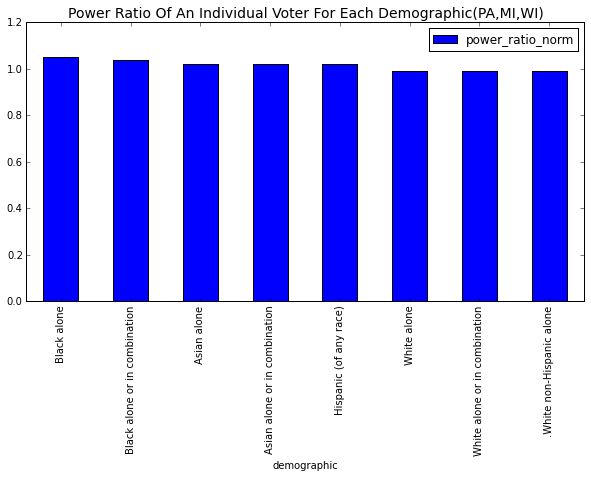

In [51]:
ax = demo_power[
    ~demo_power.index.isin(non_race)
][["power_ratio_norm"]].round(2).plot(kind="bar", figsize=(10,5))
ax.set_title("Power Ratio Of An Individual Voter For Each Demographic(PA,MI,WI)", size=14)
pass

### Step 12:
Power ratio for each state based upon individual demograpic

* Black alone

In [52]:
joined[
    joined["demographic"] == "Black alone"
].sort_values("total_registered", ascending=False).head(10)[["state", "demographic", "total_registered", "power"]]

,state,demographic,total_registered,power
5,MICHIGAN,Black alone,685.0,3.2
16,PENNSYLVANIA,Black alone,492.0,2.9
27,WISCONSIN,Black alone,129.0,2.1


* Asian Alone

In [53]:
joined[
    joined["demographic"] == "Asian alone"
].sort_values("total_registered", ascending=False).head(10)[["state", "demographic", "total_registered", "power"]]

,state,demographic,total_registered,power
17,PENNSYLVANIA,Asian alone,93.0,2.9
6,MICHIGAN,Asian alone,86.0,3.2
28,WISCONSIN,Asian alone,30.0,2.1


* Hispanic (of any race)

In [54]:
joined[
    joined["demographic"] == "Hispanic (of any race)"
].sort_values("total_registered", ascending=False).head(10)[["state", "demographic", "total_registered", "power"]]

,state,demographic,total_registered,power
18,PENNSYLVANIA,Hispanic (of any race),260.0,2.9
7,MICHIGAN,Hispanic (of any race),179.0,3.2
29,WISCONSIN,Hispanic (of any race),77.0,2.1


* White alone

In [55]:
joined[
    joined["demographic"] == "White alone"
].sort_values("total_registered", ascending=False).head(10)[["state", "demographic", "total_registered", "power"]]

,state,demographic,total_registered,power
14,PENNSYLVANIA,White alone,5452.0,2.9
3,MICHIGAN,White alone,4280.0,3.2
25,WISCONSIN,White alone,2791.0,2.1


### Step 13:
Perform the above steps inculding all states


In [56]:
demo_by_state_US = pd.read_csv("/home/ubuntu/Demographic_Data.csv", 
                            skiprows=1, skipfooter=10, na_values=["-"], engine='python').pipe(lambda x: x[x.columns[0:14]])

demo_by_state_US["State"] = demo_by_state_US["State"].fillna(method="ffill")

demo_by_state_US.columns = [
    "state", "demographic", "total_pop", "total_citizen_pop", "total_registered", 
   "pct_registered", "moe_registered", "pct_registered_citizen", 
   "moe_registered_citizen", "total_voted", "pct_voted", "moe_voted", 
   "percent_voted_citizen", "moe_voted_citizen" ]

demo_by_state_US["total_registered"] = demo_by_state_US["total_registered"].apply(lambda x: float(str(x).replace(",", "")))

joined_US= pd.merge(demo_by_state_US, voter_power_index, on="state", how="left").dropna(subset=["power"])

joined_US["demo_power"] =  joined_US["total_registered"] * joined_US["power"]

demo_grp_US = joined_US.groupby("demographic")
# Find the aggregate amount of voting power and total number of registered voters for each demographic
demo_power_US = pd.DataFrame({
    "total_power": demo_grp_US["demo_power"].sum(),
    "total_registered": demo_grp_US["total_registered"].sum(),
})
# The "power ratio" is the total power for a demographic divided by the number of registered voters
demo_power_US["power_ratio"] = demo_power_US["total_power"] / demo_power_US["total_registered"]
# Set all of the power ratios in line with the overall power ratio 
demo_power_US["power_ratio_norm"] = demo_power_US["power_ratio"] / demo_power_US.loc["Total"]["power_ratio"]
demo_power_US = demo_power_US.sort_values("power_ratio_norm", ascending=False)

demo_power_US.head(10)

,total_power,total_registered,power_ratio,power_ratio_norm
demographic,,,,
.White non-Hispanic alone,100715.6,104664.0,0.962275,1.037149
White alone,110142.7,115996.0,0.949539,1.023422
White alone or in combination,111681.4,117976.0,0.946645,1.020303
Male,61758.0,66149.0,0.933620,1.006264
Total,131900.9,142164.0,0.927808,1.000000
Female,70145.8,76019.0,0.922740,0.994538
Black alone,15602.6,17697.0,0.881652,0.950253
Black alone or in combination,16206.5,18416.0,0.880023,0.948497
Hispanic (of any race),10670.0,12863.0,0.829511,0.894055


In [57]:
demo_power_US.loc[gender][["power_ratio_norm"]].round(2)

,power_ratio_norm
demographic,
Male,1.01
Female,0.99


In [58]:
demo_power_US[
    ~demo_power_US.index.isin(non_race)
][["power_ratio_norm"]].round(2)

,power_ratio_norm
demographic,
.White non-Hispanic alone,1.04
White alone,1.02
White alone or in combination,1.02
Black alone,0.95
Black alone or in combination,0.95
Hispanic (of any race),0.89
Asian alone or in combination,0.63
Asian alone,0.60


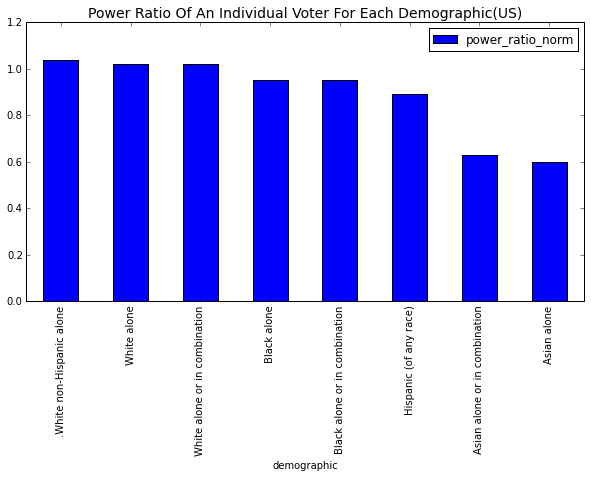

In [59]:
ax = demo_power_US[
    ~demo_power_US.index.isin(non_race)
][["power_ratio_norm"]].round(2).plot(kind="bar", figsize=(10,5))
ax.set_title("Power Ratio Of An Individual Voter For Each Demographic(US)", size=14)
pass

### Results

> + Average white non-Hispanic voter could have had nearly two times influence than an average Asian voter(across US)

> + All races could have had almost equal influence on the election (PA,MI,WI)

> + High concentration of Asian voters in certain safe states had Less influence on the elections.


## V. Future Analysis

* Although the analysis does show voting trend based upon Income groups and Race we could further look into Income Equality as an aspect.
* The Gini Co-efficient of the income of a county/zip code can be accounted for and similar analysis can be performed whether Income Inequality was a reason for this flip.


## VI.  High-level analysis of impact Gini-co-effecient impact

The Gini Coefficient is a measure of inequality, ranging from 0 to 1 with 0 being totally equality and 1 total inequality. Without data of every individual income, we used IRS reported AGI brackets to approximate the Gini Coefficient. With IRS data we were able to learn the total income reported as well as number of returns for each of six income brackets (<$25K, $25K-50K, $50K-75K, $75K-100K, $100K-$200K, and $200K+).

We performed this for each state for the years 2008, 2012, and 2016 and compared to the differential of votes for the republican candidate less the number of votes for the democratic candidate at a high level to view the results.

<img src="images/Capture.PNG">
<img src="images/Capture1.PNG">
<img src="images/Capture2.PNG">

### Results:
>Although the Gini coefficient increased from 2008-2012 in all three states, reflecting an increase in inequality, the coefficient decreased from 2012-2016. This implies that income inequality was not the primary explanatory variable for the 2016 election results. With both income growth and income inequality ruled out, it will take much more complex models to explain these results. 